In [ ]:
from pandas import Series
from pandas import DataFrame
pd.options.display.mpl_style = 'default'

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set_context("talk")

Spark
----------

![IPython](Image/spark-logo-trademark.png "IPython")

- Apache Spark 是一个新兴的大数据处理通用引擎，提供了分布式的内存抽象(RDD)。Spark 正如其名，最大的特点就是快（Lightning-fast），可比 Hadoop MapReduce 的处理速度快 100 倍。

- 此外，Spark 提供了简单易用的 API，几行代码就能实现 WordCount。
    - Java
    - Scala
    - Python
    - R

# Spark快速入门指南 – Spark安装与基础使用
Reference: 
http://www.powerxing.com/spark-quick-start-guide/#more-291

官方网站：(vedio/talks/books/Exercise)
https://spark.apache.org/documentation.html


## Agenda
- Hadoop Ecosystem
- 组件
- 运行环境
- Spark Excution Model
- 运行Spark - Local mode示例
- Spark Shell (Scala/Pyspark)进行交互分析
- RDD基础操作
- Examples
- Self-Contained Applications

- Monitoring and Instrumentation

### Next
- Spark Standalone cluster
- Spark SQL 和 DataFrames

### RISE
"Live" Reveal.js Jupyter/IPython Slideshow Extension Edit Add topics

Option 1 - Using conda (recommended):

In [ ]:
>conda install -c damianavila82 rise

In [ ]:
# from IPython.display import Image
# Image(filename='Image/spark-logo-trademark.png')

## Hadoop Ecosystem
----------
![IPython](Image/HADOOP-ECOSYSTEM-Edureka.png "IPython")

## 组件
![IPython](Image/spark-stack.png "IPython")

## 运行环境
- CentOS 6.4 
- Spark 1.6.0
- Hadoop 2.6.5
- Java JDK 1.7
- Scala 2.10.5

#### Spark Excution Model
![IPython](Image/spark-components.png "IPython")

## 运行Spark - Local mode示例

In [ ]:
#一般以 Spark 的安装目录（/usr/local/spark）为当前路径
$ cd /usr/local/spark

# local 模式下运行例子
$ ./bin/run-example SparkPi

#extract the result from the screen
$ ./bin/run-example SparkPi 2>&1 | grep "Pi is roughly"

In [ ]:
# Python 版本的 SparkPi 则需要通过 spark-submit 运行：
$ ./bin/spark-submit examples/src/main/python/pi.py

##  Spark Shell (Scala/Pyspark)进行交互分析

In [ ]:
#一般以 Spark 的安装目录（/usr/local/spark）为当前路径
$ cd /usr/local/spark

#run pyspark shell as local mode
$ ./bin/pyspark
#不需要加任何参量

#scala shell
$./bin/spark-shell

![IPython](Image/spark-pyspark1.png "IPython")

### Initializing Spark - SparkContext object 

In [ ]:
# The first thing a Spark program must do is to create a SparkContext object, 
# which tells Spark how to access a cluster.

# To create a SparkContext you first need to build a SparkConf object that contains 
# information about your application.
conf = SparkConf().setAppName(appName).setMaster(master)

sc = SparkContext(conf=conf)

# master is a Spark, Mesos or YARN cluster URL, or a special “local” string to run in 
#local mode. 
#In practice, when running on a cluster, you will not want to hardcode master in the 
#program, but rather launch the application with spark-submit and receive it there

### 简单命令 

In [ ]:
# check the version of spark
>>>sv.version

#show the mode
>>>sc.master

#show the app Name
>>>sc.appName

#show the defaut parallelism
>>>sc.defaultParallelism

### RDD基础操作
a fault-tolerant collection of elements that can be operated on in parallel. <br>
Spark 的主要抽象是分布式的元素集合（distributed collection of items），称为RDD（Resilient Distributed Dataset，弹性分布式数据集），它可被分发到集群各个节点上，进行并行操作。

two ways to create RDDs: 

- or parallelizing an existing collection in your driver program。<br>

- referencing a dataset in an external storage system:<br>such as a shared filesystem, HDFS,Hive，HBase,Cassandra or any data source offering a Hadoop InputFormat.<br>(RDDs 可以通过 Hadoop InputFormats 创建（如 HDFS）)



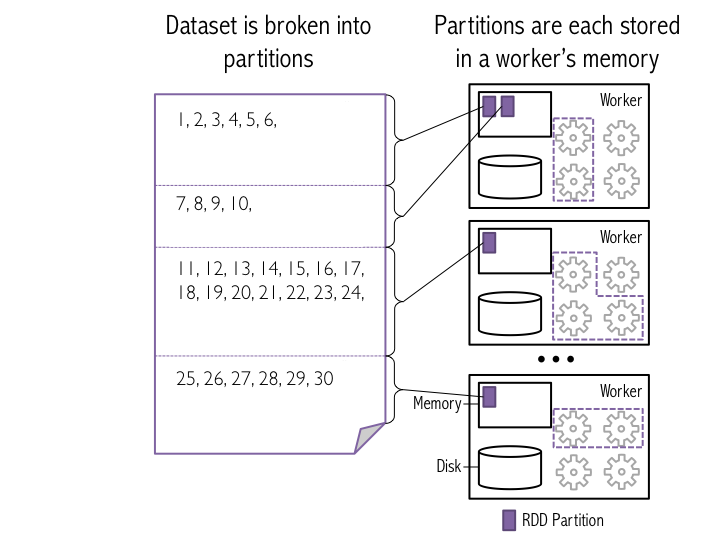

In [13]:
Image(filename= 'Image/RDD-example1.png')

## Examples:
- Example1 :Create a RDD by parallelize function
- Example 2 :create a RDD by parallelize function from external data
- Example 3 : Calculate the num of line containning "Spark"
- Examle 4: find the line with the most words:
- Example 5:compute the per-word counts




#### Example1 :Create a RDD by parallelize function

In [ ]:
#For example, here is how to create a parallelized collection holding the numbers 1 to 5:
data = range(1000000)

#create a RDD by parallelize function
distData = sc.parallelize(data,10)
# the number of partitions: 10 (default value:2)
#One important parameter for parallel collections is the number of partitions to cut the 
#dataset into. 
#Spark will run one task for each partition of the cluster. 
#Typically you want 2-4 partitions for each CPU in your cluster.(default value :2)

# add up the elements of the list.
distData.reduce(lambda a, b: a + b)

#### Example 2 :create a RDD by parallelize function from external data

In [ ]:
#Text file RDDs can be created using SparkContext’s textFile method. 
#This method takes an URI for the file (either a local path on the machine, or a 
# hdfs://, s3n://, etc URI) and reads it as a collection of lines.
distFile = sc.textFile("file:///usr/local/spark/README.md")

#RDD 中的 item 数量，对于文本文件，就是总行数
distFile.count()

#RDD 中的第一个 item，对于文本文件，就是第一行内容
distFile.first()

#add up the sizes of all the lines using the map and reduce operations
distFile.map(lambda s: len(s)).reduce(lambda a, b: a + b)

### RDD Operations
 - transformations:
   
   which create a new dataset from an existing one
   
   
 - actions (“jobs” (Spark actions) )
  
  which return a value to the driver program after running a computation on the dataset. 

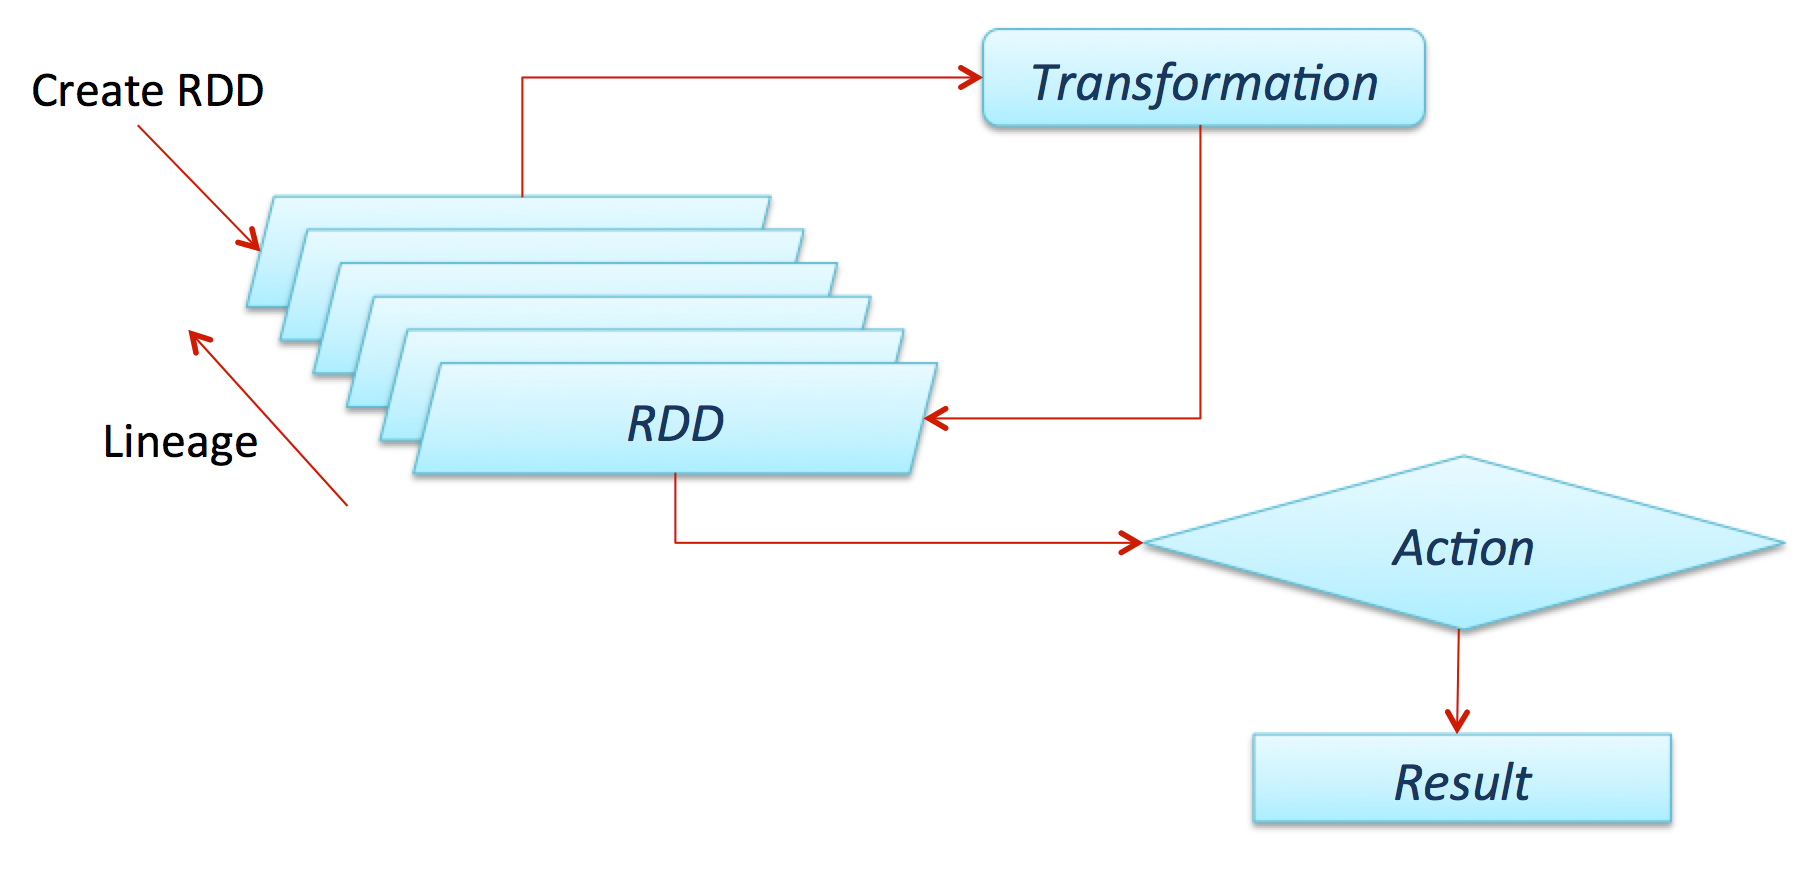

In [14]:
Image(filename='Image/RDD-operation1.png')

![IPython](Image/spark-rdd2.png "IPython")

#### Example 3 : Calculate the num of line containning "Spark"

In [ ]:
#Text file RDDs can be created using SparkContext’s textFile method. 
#This method takes an URI for the file (either a local path on the machine, or a 
# hdfs://, s3n://, etc URI) and reads it as a collection of lines.
>>> distFile = sc.textFile("file:///usr/local/spark/README.md")

# use the filter() transformation to return a new RDD with a subset of the items in the file.
>>> linesWithSpark = distFile.filter(lambda line: "Spark" in line)


# use the count() action to return the num of lines containing ‘Spark’
>>> lineWithSpark.count()

'''
可以看到一共有 17 行内容包含 Spark，
这与通过 Linux 命令 cat ./README.md | grep "Spark" -c 得到的结果一致，说明是正确的
'''

# chain together transformations and actions:
# How many lines contain "Spark"?
>>> distFile.filter(lambda line: "Spark" in line).count() 


#### Lazy evaluation
linesWithSpark.toDebugString

#### Examle 4: find the line with the most words:

In [ ]:
>>> distFile = sc.textFile("file:///usr/local/spark/README.md")

>>> distFile.map(lambda line: len(line.split())).reduce(lambda a, b: a if (a > b) else b)
'''
This first maps a line to an integer value, creating a new RDD. 
reduce is called on that RDD to find the largest line count. 
The arguments to map and reduce are Python anonymous functions (lambdas),'''


In [ ]:
#we can also pass any top-level Python function we want. 
#For example, we’ll define a max function to make this code easier to understand:
>>> def max(a, b):
...     if a > b:
...         return a
...     else:
...         return b
...

>>> textFile.map(lambda line: len(line.split())).reduce(max)
15

#### Example 5:compute the per-word counts 

In [ ]:
>>> distFile = sc.textFile("file:///usr/local/spark/README.md")
#One common data flow pattern is MapReduce, as popularized by Hadoop. 
#Spark can implement MapReduce flows easily

#Here, we combined the flatMap, map, and reduceByKey transformations to compute 
#the per-word counts in the file as an RDD of (string, int) pairs. 
>>> wordCounts = distFile.flatMap(lambda line: line.split())
                            .map(lambda word: (word, 1))
                            .reduceByKey(lambda a, b: a+b)
        
# you can cache  if you want to use it later
#wordCounts.cache()
        
# Output the num of word on the console
>>>wordCounts.count() 

# you can time it 
#>>>%time wordCounts.count()

#To collect the word counts in our shell, we can use the collect action:        
>>> wordCounts.collect()

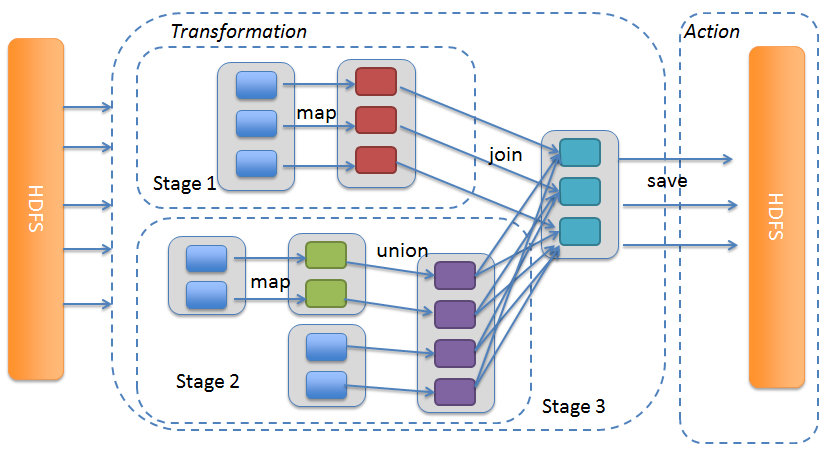

In [21]:
Image(filename = 'Image/spark-operation1.png')

#### Transformation

In [ ]:
map(func)	Return a new distributed dataset formed by passing each element of the source through a function func.

filter(func)	Return a new dataset formed by selecting those elements of the source on which func returns true.

flatMap(func)	Similar to map, but each input item can be mapped to 0 or more output items (so func should return a Seq rather than a single item).

mapPartitions(func)	Similar to map, but runs separately on each partition (block) of the RDD, so func must be of type Iterator<T> => Iterator<U> when running on an RDD of type T.

mapPartitionsWithIndex(func)	Similar to mapPartitions, but also provides func with an integer value representing the index of the partition, so func must be of type (Int, Iterator<T>) => Iterator<U> when running on an RDD of type T.

sample(withReplacement, fraction, seed)	Sample a fraction fraction of the data, with or without replacement, using a given random number generator seed.

union(otherDataset)	Return a new dataset that contains the union of the elements in the source dataset and the argument.

intersection(otherDataset)	Return a new RDD that contains the intersection of elements in the source dataset and the argument.

distinct([numTasks]))	Return a new dataset that contains the distinct elements of the source dataset.

groupByKey([numTasks])	When called on a dataset of (K, V) pairs, returns a dataset of (K, Iterable<V>) pairs. 

Note: If you are grouping in order to perform an aggregation (such as a sum or average) over each key, using reduceByKey or aggregateByKey will yield much better performance. 
Note: By default, the level of parallelism in the output depends on the number of partitions of the parent RDD. You can pass an optional numTasks argument to set a different number of tasks.

reduceByKey(func, [numTasks])	When called on a dataset of (K, V) pairs, returns a dataset of (K, V) pairs where the values for each key are aggregated using the given reduce function func, which must be of type (V,V) => V. Like in groupByKey, the number of reduce tasks is configurable through an optional second argument.

aggregateByKey(zeroValue)(seqOp, combOp, [numTasks])	When called on a dataset of (K, V) pairs, returns a dataset of (K, U) pairs where the values for each key are aggregated using the given combine functions and a neutral "zero" value. Allows an aggregated value type that is different than the input value type, while avoiding unnecessary allocations. Like in groupByKey, the number of reduce tasks is configurable through an optional second argument.

sortByKey([ascending], [numTasks])	When called on a dataset of (K, V) pairs where K implements Ordered, returns a dataset of (K, V) pairs sorted by keys in ascending or descending order, as specified in the boolean ascending argument.

join(otherDataset, [numTasks])	When called on datasets of type (K, V) and (K, W), returns a dataset of (K, (V, W)) pairs with all pairs of elements for each key. Outer joins are supported through leftOuterJoin, rightOuterJoin, and fullOuterJoin.

cogroup(otherDataset, [numTasks])	When called on datasets of type (K, V) and (K, W), returns a dataset of (K, (Iterable<V>, Iterable<W>)) tuples. This operation is also called groupWith.

cartesian(otherDataset)	When called on datasets of types T and U, returns a dataset of (T, U) pairs (all pairs of elements).
pipe(command, [envVars])	Pipe each partition of the RDD through a shell command, e.g. a Perl or bash script. RDD elements are written to the process's stdin and lines output to its stdout are returned as an RDD of strings.

coalesce(numPartitions)	Decrease the number of partitions in the RDD to numPartitions. Useful for running operations more efficiently after filtering down a large dataset.

repartition(numPartitions)	Reshuffle the data in the RDD randomly to create either more or fewer partitions and balance it across them. This always shuffles all data over the network.

repartitionAndSortWithinPartitions(partitioner)	Repartition the RDD according to the given partitioner and, within each resulting partition, sort records by their keys. This is more efficient than calling repartition and then sorting within each partition because it can push the sorting down into the shuffle machinery.

#### Actions
The following table lists some of the common actions supported by Spark. Refer to the RDD API doc (Scala, Java, Python, R)

and pair RDD functions doc (Scala, Java) for details.

In [ ]:
reduce(func)	Aggregate the elements of the dataset using a function func (which takes two arguments and returns one). The function should be commutative and associative so that it can be computed correctly in parallel.

collect()	Return all the elements of the dataset as an array at the driver program. This is usually useful after a filter or other operation that returns a sufficiently small subset of the data.

count()	Return the number of elements in the dataset.

first()	Return the first element of the dataset (similar to take(1)).

take(n)	Return an array with the first n elements of the dataset.

takeSample(withReplacement, num, [seed])	Return an array with a random sample of num elements of the dataset, with or without replacement, optionally pre-specifying a random number generator seed.

takeOrdered(n, [ordering])	Return the first n elements of the RDD using either their natural order or a custom comparator.

saveAsTextFile(path)	Write the elements of the dataset as a text file (or set of text files) in a given directory in the local filesystem, HDFS or any other Hadoop-supported file system. Spark will call toString on each element to convert it to a line of text in the file.

saveAsSequenceFile(path) 
(Java and Scala)	Write the elements of the dataset as a Hadoop SequenceFile in a given path in the local filesystem, HDFS or any other Hadoop-supported file system. This is available on RDDs of key-value pairs that implement Hadoop's Writable interface. In Scala, it is also available on types that are implicitly convertible to Writable (Spark includes conversions for basic types like Int, Double, String, etc).

saveAsObjectFile(path) 
(Java and Scala)	Write the elements of the dataset in a simple format using Java serialization, which can then be loaded using SparkContext.objectFile().

countByKey()	Only available on RDDs of type (K, V). Returns a hashmap of (K, Int) pairs with the count of each key.

foreach(func)	Run a function func on each element of the dataset. This is usually done for side effects such as updating an Accumulator or interacting with external storage systems. 

Note: modifying variables other than Accumulators outside of the foreach() may result in undefined behavior. See Understanding closures for more details.

## Monitoring and Instrumentation
- web UIs<br>
   
- metrics
- external instrumentation.

In [ ]:
http://<driver-node>:4040 :
http:10.9.1.59:4040"

Every SparkContext launches a web UI, by default on port 4040, that displays useful information about the application. This includes:

- A list of scheduler stages and tasks
- A summary of RDD sizes and memory usage
- Environmental information.
- Information about the running executors

Note : set spark.eventLog.enabled to true before starting the application

#### the Hierachy of job
- job 
- stages 
- tosses
- tasks

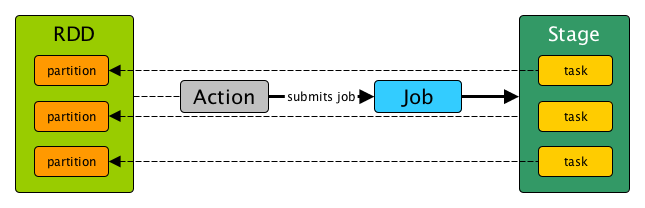

In [22]:
Image(filename = 'Image/spark-stage-tasks-jobs.png')

## Self-Contained Applications
Now we will show how to write an application using the Python API (PySpark).
As an example, we’ll create a simple Spark application, SimpleApp.py:

- 1. creat a SimpleApp.py
- 2. Launching Applications with spark-submit

In [ ]:
"""SimpleApp.py"""
from pyspark import SparkContext

#logFile = "YOUR_SPARK_HOME/README.md"  # Should be some file on your system
logFile = "file：///usr/local/spark/README.md" 
sc = SparkContext("local", "Simple App")
logData = sc.textFile(logFile).cache()

numAs = logData.filter(lambda s: 'a' in s).count()
numBs = logData.filter(lambda s: 'b' in s).count()

print("Lines with a: %i, lines with b: %i" % (numAs, numBs))

In [ ]:
# Use spark-submit to run your application
$ YOUR_SPARK_HOME/bin/spark-submit --master local[4] SimpleApp.py
...
Lines with a: 58, Lines with b: 26

## Standalone Cluster
（1 Name-Node(Drive-Node/Master) + 2 Worker-Node(Slave)）

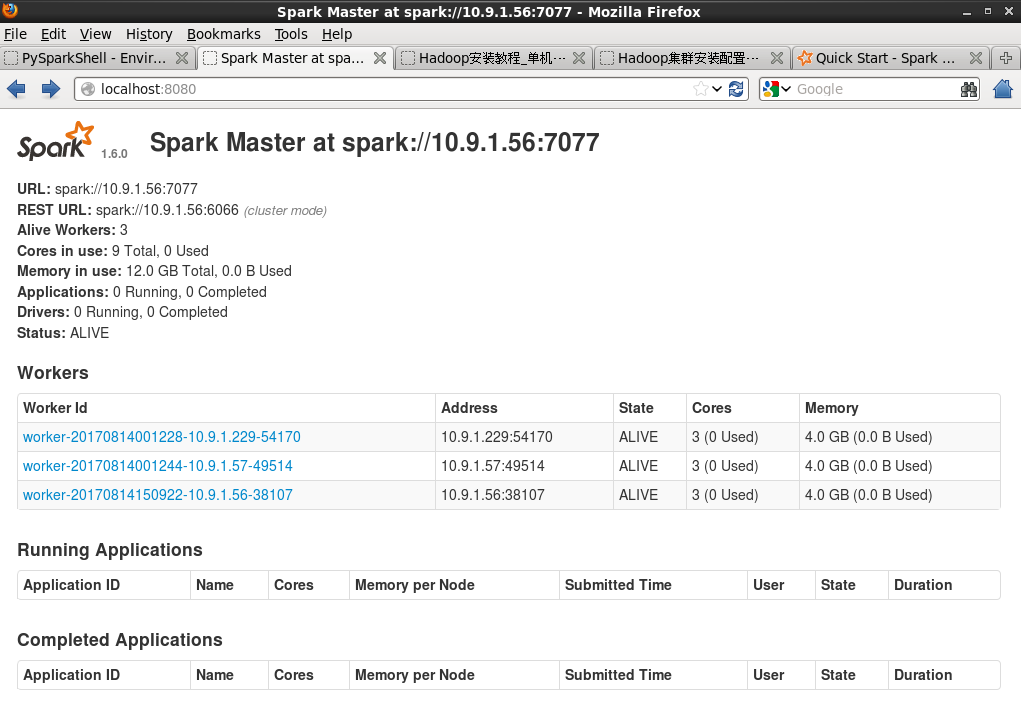

In [24]:
Image(filename = 'Image/Spark-master.png')

### Caching(缓存)

Spark also supports pulling data sets into a cluster-wide in-memory cache. This is very useful when data is accessed repeatedly, such as when querying a small “hot” dataset or when running an iterative algorithm like PageRank. 



In [ ]:
#As a simple example, let’s mark our linesWithSpark dataset to be cached:
>>> linesWithSpark.cache()

>>> linesWithSpark.count()
19

>>> linesWithSpark.count()
19   

## Spark SQL 和 DataFrames
Spark SQL 是 Spark 内嵌的模块，用于结构化数据。在 Spark 程序中可以使用 SQL 查询语句或 DataFrame API。DataFrames 和 SQL 提供了通用的方式来连接多种数据源，支持 Hive、Avro、Parquet、ORC、JSON、和 JDBC，并且可以在多种数据源之间执行 join 操作。

# 官网文档

### Spark application (instance of SparkContext)

Application
  
  - a driver program 
  - executors on the cluster.
   (parallel operations)

### The main abstraction:
1. resilient distributed dataset (RDD),

2. shared variables

 - broadcast variables
 - accumulators
 



### Starting a Cluster Manually

In [ ]:
#You can start a standalone master server by executing:
./sbin/start-master.sh

#Similarly, you can start one or more workers and connect them to the master via:
./sbin/start-slave.sh <master-spark-URL>

#SPARK_WORKER_INSTANCES=3 SPARK_WORKER_CORES=2 ./sbin/start-slaves.sh

'''
Once started, the master will print out a spark://HOST:PORT URL for itself, 
which you can use to connect workers to it, or pass as the “master” argument to 
SparkContext. You can also find this URL on the master’s web UI, which is 
http://localhost:8080 by default.
'''

### Cluster Launch Scripts

In [ ]:
sbin/start-master.sh - Starts a master instance on the machine the script is executed on.
sbin/start-slaves.sh - Starts a slave instance on each machine specified in the conf/slaves file.
sbin/start-slave.sh - Starts a slave instance on the machine the script is executed on.
sbin/start-all.sh - Starts both a master and a number of slaves as described above.
sbin/stop-master.sh - Stops the master that was started via the bin/start-master.sh script.
sbin/stop-slaves.sh - Stops all slave instances on the machines specified in the conf/slaves file.
sbin/stop-all.sh - Stops both the master and the slaves as described above.

### Start the shell 

In [ ]:
# start the scala shell for the cluster in standalone mode 
./bin/spark-shell --master spark://10.9.1.56:7077

#to launch an interactive Python shell.
./bin/pyspark --master spark://10.9.1.56:7077


### Connecting an Application to the Cluster

### Launching Spark Applications
#### Deploy mode	
Distinguishes where the driver process runs.
- In "cluster" mode, the framework launches the driver inside of the cluster. 
- In "client" mode, the submitter launches the driver outside of the cluster.


# Linking with Spark

In [ ]:
bin/pyspark
#to launch an interactive Python shell.

from pyspark import SparkContext, SparkConf
#import some Spark classes into your program

$ PYSPARK_PYTHON=python3.4 bin/pyspark
$ PYSPARK_PYTHON=/opt/pypy-2.5/bin/pypy bin/spark-submit examples/src/main/python/pi.py
# It uses the default python version in PATH, you can specify which version of Python you want to use by 
# PYSPARK_PYTHON

bin/spark-submit 
#script located in the Spark directory. This script will load Spark’s Java/Scala libraries 
#and allow you to submit applications to a cluster. 

# Using the Shell--PySpark shell

In [ ]:
In the PySpark shell, a special interpreter-aware SparkContext is already created for you,
in the variable called sc.

In [ ]:
#For example, to run bin/pyspark on exactly four cores,

$ ./bin/pyspark --master local[4] --py-files code.py

# bin/pyspark
#to launch an interactive Python shell.
# --master argument: 
#which master the context connects to using
# --py-files
#add Python .zip, .egg or .py files to the runtime path by passing a comma-separated list


In [ ]:
pyspark --help
#for help


### Passing Functions to Spark
- Lambda expressions
- Local defs inside the function calling into Spark, for longer code.
- Top-level functions in a module.

In [ ]:
"""MyScript.py"""
if __name__ == "__main__":
    def myFunc(s):
        words = s.split(" ")
        return len(words)

    sc = SparkContext(...)
    sc.textFile("file.txt").map(myFunc)

# Submitting Applications

In [1]:
The spark-submit script in Spark’s bin directory 

SyntaxError: invalid syntax (<ipython-input-1-07b91afb836c>, line 1)

### Bundling Your Application’s Dependencies

In [2]:
create an assembly jar (or “uber” jar) containing your code and its dependencies

For Python, you can use the 
--py-files argument of spark-submit 
to add .py, .zip or .egg files to be distributed with your application. 
If you depend on multiple Python files we recommend packaging them into a .zip or .egg.

SyntaxError: invalid syntax (<ipython-input-2-326a7989e57a>, line 1)

### launch the application with spark-submit

In [3]:
./bin/spark-submit \
  --class <main-class> \
  --master <master-url> \
  --deploy-mode <deploy-mode> \
  --conf <key>=<value> \
  ... # other options
  <application-jar> \
  [application-arguments]

SyntaxError: invalid syntax (<ipython-input-3-333507bd1494>, line 1)

# Monitoring
Every SparkContext launches a web UI, by default on port 4040

In [ ]:
http://<driver-node>:4040
        

# Job Scheduling